## Imports

In [ ]:
# %matplotlib inline

import numpy as np
import pandas as pd
import gensim
import utils
import re  
import lightgbm as lgb
import seaborn as sns
import warnings
import xgboost as xgb
from utils import clean_dataset
from lightgbm import LGBMRegressor
from sklearn.manifold import TSNE
# from utils import word_vector
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

random_state=2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

In [ ]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


## CBOW

In [ ]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_CBOW_Captions.model")


(46355031, 49024560)

In [ ]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,model_w2v_caption)
w2v_df_caption = pd.DataFrame(wordvec_arrays)
w2v_df_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### EmojiText

In [ ]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_emojiText = gensim.models.Word2Vec(tokenized_emojiText,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_emojiText.train(tokenized_emojiText, total_examples= len(df['emoji_text']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(6260752, 9538300)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,model_w2v_emojiText)
w2v_df_emojiText = pd.DataFrame(wordvec_arrays)
w2v_df_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

## hashtags

In [ ]:
tokenized_hashtags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_hashtags = gensim.models.Word2Vec(tokenized_hashtags,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_hashtags.train(tokenized_hashtags, total_examples= len(df['hashtags']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(9071810, 10681100)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_hashtags), 100)) 
for i in range(len(tokenized_hashtags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hashtags[i], 100,model_w2v_hashtags)
w2v_df_hashtags = pd.DataFrame(wordvec_arrays)
w2v_df_hashtags.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

## mentions

In [ ]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_mentions = gensim.models.Word2Vec(tokenized_mentions,
        size=100, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_mentions.train(tokenized_mentions, total_examples= len(df['mentions']), epochs=20)
# model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

(616191, 2139760)

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,model_w2v_mentions)
w2v_df_mentions = pd.DataFrame(wordvec_arrays)
w2v_df_mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

In [ ]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_caption,w2v_df_hashtags,w2v_df_emojiText,w2v_df_mentions, df)))

In [ ]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,1.048308,-1.484959,-0.040418,1.222113,0.2461,0.667611,-0.354415,0.481599,-0.67647,0.573749,...,0.233333,0.2,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,1.410986,-0.414224,-0.957707,-0.735842,-1.497734,1.288153,0.266369,0.348732,-0.221316,2.813405,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,0.755975,-1.903093,-0.676607,0.255105,0.899132,-0.073528,-0.018407,0.272041,-0.938422,-0.424889,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,-0.006468,-0.227039,0.00826,1.495929,-0.976815,1.215594,-0.296824,0.263649,-1.466227,1.301866,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.0
4,1.323508,-1.017898,-0.752785,-1.816666,0.664157,0.744491,0.565487,0.113026,-0.791755,0.033906,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.792696,-0.163289,-0.473278,0.097567,0.689758,0.735582,-0.613774,-0.256552,-0.330709,-1.342177,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.15
88510,-0.070895,-0.104293,0.205211,-0.25183,0.280544,-0.213568,-0.312118,0.170194,0.102661,-0.479118,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,0.489627,-1.263804,1.059762,0.030222,0.358414,0.799529,0.347153,-0.643095,0.496444,0.281061,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,0.603012,0.086142,-0.327454,0.249069,0.550971,0.438101,-0.648708,-0.295392,-0.284201,-1.553868,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
print(len(w2v_Df.columns))
a=len(w2v_Df.columns)-43
print(a)
w2v_Df[len(w2v_Df.columns)-43]
w2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(w2v_Df)

446
403
Couldn't covert 401 to float
Couldn't covert 438 to float
Couldn't covert 440 to float
Couldn't covert 442 to float
Couldn't covert 443 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.539317,0.444527,0.542967,0.648213,0.431113,0.660229,0.397968,0.668146,0.404964,0.581203,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.574639,0.543196,0.442953,0.479123,0.278948,0.726998,0.457676,0.657684,0.461754,0.814499,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.510846,0.405995,0.473602,0.564702,0.488096,0.580483,0.430286,0.651646,0.372279,0.477180,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.436590,0.560445,0.548274,0.671860,0.324403,0.719191,0.403507,0.650985,0.306424,0.657048,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.566119,0.487567,0.465296,0.385783,0.467592,0.668501,0.486445,0.639125,0.390579,0.524970,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.514422,0.566320,0.495771,0.551097,0.469826,0.667542,0.373022,0.610026,0.448105,0.381630,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.430315,0.571756,0.569748,0.520923,0.434118,0.565415,0.402036,0.643626,0.502178,0.471531,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.484906,0.464906,0.662922,0.545281,0.440913,0.674423,0.465446,0.579590,0.551311,0.550715,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.495948,0.589305,0.511671,0.564181,0.457716,0.635534,0.369662,0.606967,0.453908,0.359579,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
dropped = [106,108,109,111,112,113]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,439,441,444,445
0,0.539317,0.444527,0.542967,0.648213,0.431113,0.660229,0.397968,0.668146,0.404964,0.581203,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.574639,0.543196,0.442953,0.479123,0.278948,0.726998,0.457676,0.657684,0.461754,0.814499,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.510846,0.405995,0.473602,0.564702,0.488096,0.580483,0.430286,0.651646,0.372279,0.477180,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.436590,0.560445,0.548274,0.671860,0.324403,0.719191,0.403507,0.650985,0.306424,0.657048,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.566119,0.487567,0.465296,0.385783,0.467592,0.668501,0.486445,0.639125,0.390579,0.524970,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.514422,0.566320,0.495771,0.551097,0.469826,0.667542,0.373022,0.610026,0.448105,0.381630,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.430315,0.571756,0.569748,0.520923,0.434118,0.565415,0.402036,0.643626,0.502178,0.471531,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.484906,0.464906,0.662922,0.545281,0.440913,0.674423,0.465446,0.579590,0.551311,0.550715,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.495948,0.589305,0.511671,0.564181,0.457716,0.635534,0.369662,0.606967,0.453908,0.359579,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2)

### LightGBM

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_w2v_df, y_train_w2v_df,eval_set=[(x_train_w2v_df, y_train_w2v_df), (x_test_w2v_df, y_test_w2v_df)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30002]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30003]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30004]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30005]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30006]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30007]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30008]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's l2: 5.54646e-05	valid_1's l1: 0.0017872
[30009]	training's l2: 5.76353e-05	training's l1: 0.0017547	valid_1's

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_w2v_df)
lgbm.score(x_test_w2v_df, y_test_w2v_df)

0.6215131512521856

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### XGboost 

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred = xg_reg.predict(x_test_w2v_df)

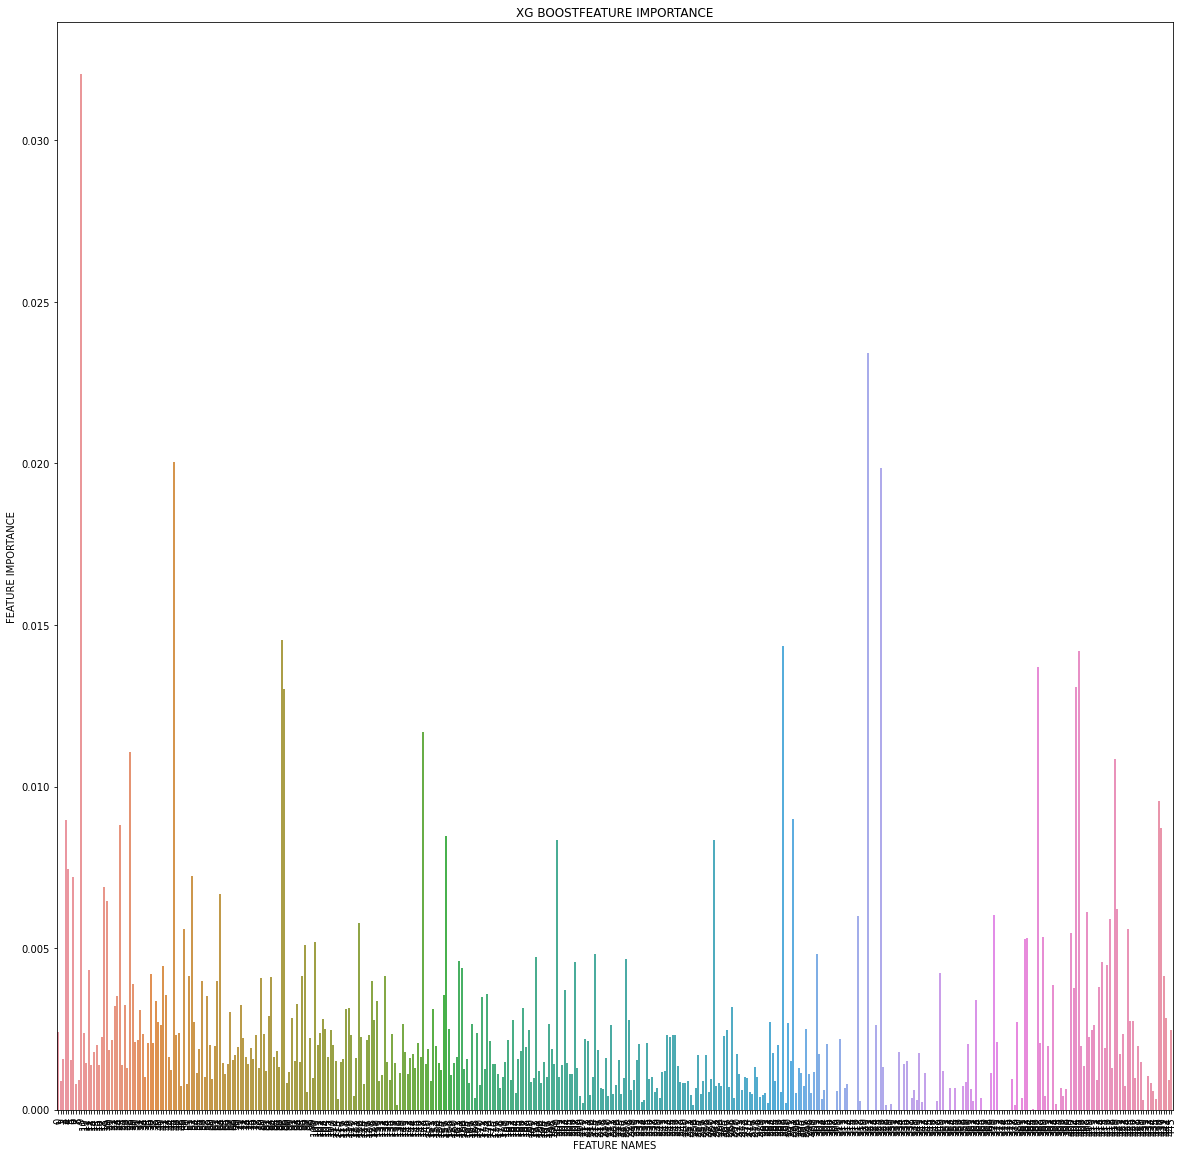

In [ ]:
plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00240
Feature: 1, Score: 0.00089
Feature: 2, Score: 0.00158
Feature: 3, Score: 0.00896
Feature: 4, Score: 0.00745
Feature: 5, Score: 0.00154
Feature: 6, Score: 0.00721
Feature: 7, Score: 0.00081
Feature: 8, Score: 0.00092
Feature: 9, Score: 0.03204
Feature: 10, Score: 0.00239
Feature: 11, Score: 0.00143
Feature: 12, Score: 0.00432
Feature: 13, Score: 0.00139
Feature: 14, Score: 0.00179
Feature: 15, Score: 0.00199
Feature: 16, Score: 0.00139
Feature: 17, Score: 0.00226
Feature: 18, Score: 0.00689
Feature: 19, Score: 0.00647
Feature: 20, Score: 0.00185
Feature: 21, Score: 0.00214
Feature: 22, Score: 0.00321
Feature: 23, Score: 0.00352
Feature: 24, Score: 0.00880
Feature: 25, Score: 0.00139
Feature: 26, Score: 0.00324
Feature: 27, Score: 0.00128
Feature: 28, Score: 0.01107
Feature: 29, Score: 0.00389
Feature: 30, Score: 0.00208
Feature: 31, Score: 0.00215
Feature: 32, Score: 0.00307
Feature: 33, Score: 0.00235
Feature: 34, Score: 0.00103
Feature: 35, Score: 0.00208
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_rnd = rnd_clf.predict(x_test_w2v_df)

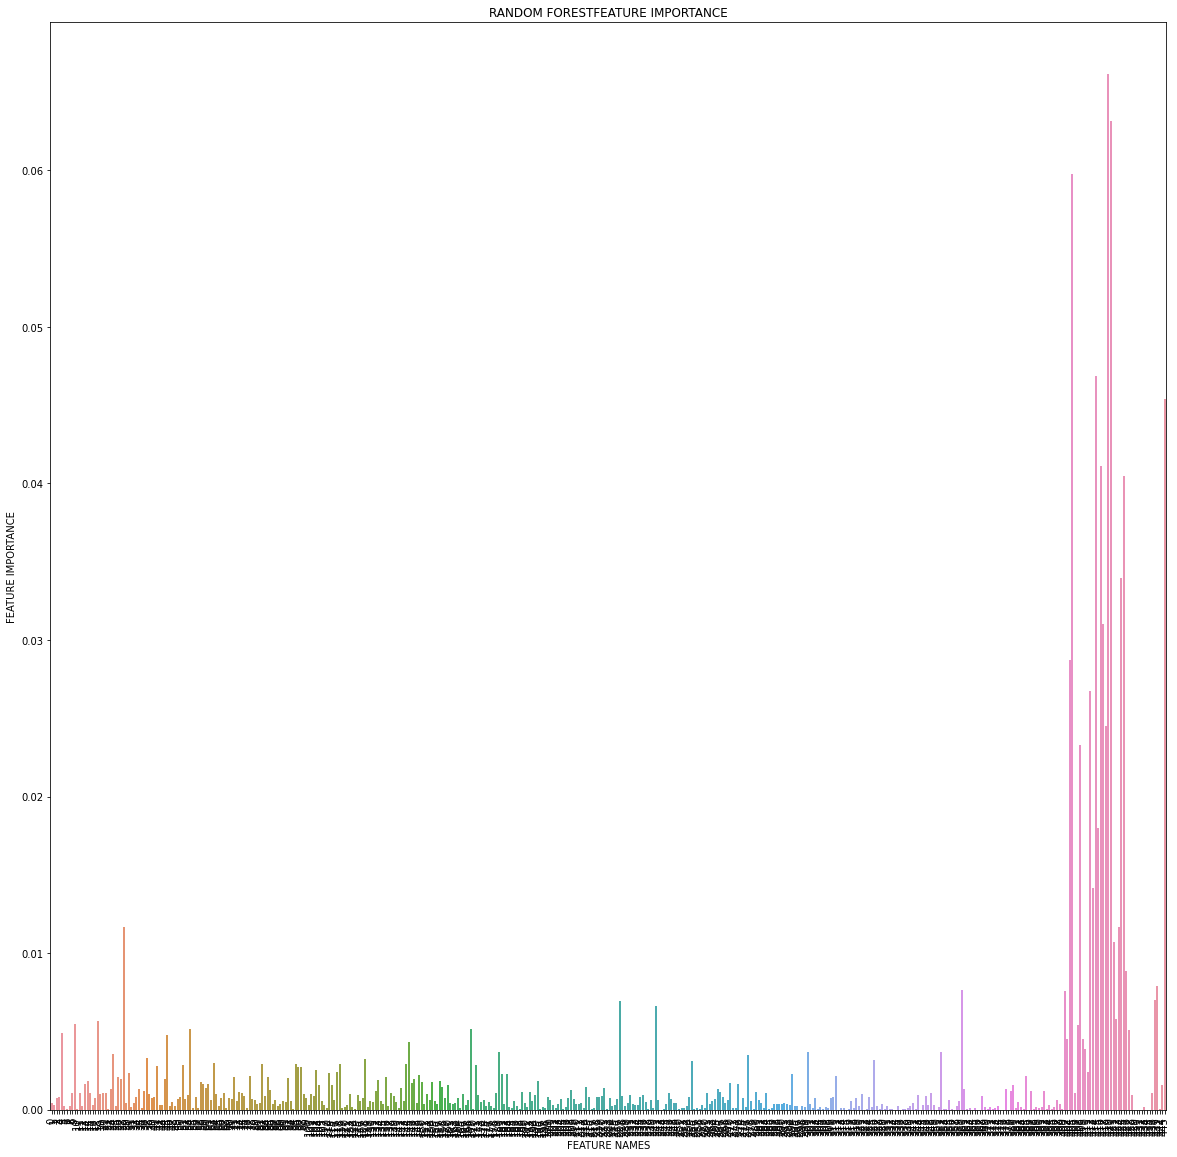

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_mlp = mlp_GS.predict(x_test_w2v_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVM

In [ ]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_w2v_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_w2v_df,y_pred_w2vec_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.007447,0.621513,0.001787,-4.899883,0.304083
1,XGboost,0.007082,0.657789,0.001437,-4.950260,0.293903
2,Random Forest,0.007576,0.608360,0.001704,-4.882802,0.271130
3,MLP,0.009720,0.355222,0.003136,-4.633520,0.354472
4,SVR,0.012539,-0.072932,0.003269,-4.378898,0.387544
